# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# Get Weather Data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
weather_url = f"{url}appid={weather_api_key}&units={units}&q="

response = requests.get(weather_url + city)
city_weather_json = response.json()
print(json.dumps(city_weather_json, indent=4))

{
    "coord": {
        "lon": -134.9692,
        "lat": -23.1203
    },
    "weather": [
        {
            "id": 500,
            "main": "Rain",
            "description": "light rain",
            "icon": "10n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 74.91,
        "feels_like": 75.81,
        "temp_min": 74.91,
        "temp_max": 74.91,
        "pressure": 1017,
        "humidity": 79,
        "sea_level": 1017,
        "grnd_level": 1014
    },
    "visibility": 10000,
    "wind": {
        "speed": 18.59,
        "deg": 342,
        "gust": 22.17
    },
    "rain": {
        "1h": 0.41
    },
    "clouds": {
        "all": 76
    },
    "dt": 1657358147,
    "sys": {
        "country": "PF",
        "sunrise": 1657381280,
        "sunset": 1657420110
    },
    "timezone": -32400,
    "id": 4030556,
    "name": "Rikitea",
    "cod": 200
}


In [10]:
#url for weather api call

url = f"http://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}"


#Empty list of city to append data related to each city
city_data = []

print("Beginning Data Retrieval")
print ("---------------------------")

record_counter = 1
set_counter = 1
#loop through each city in the list
for index, city in enumerate(cities):
    if(index % 50 == 0 and index >= 50):
        set_counter += 1
        record_counter = 0
    #creating each city endpoint URL
    city_weath_url = url + "&q=" + city 
    
    print(f"processing record {record_counter} of set {set_counter} | {city}")
    
    record_counter +=1
    
    #exception handling
    try:
        #api request for each city
        #retrieve dat with json
        city_data_json = requests.get(city_weath_url).json()
        
        latitude = city_data_json["coord"]["lat"]
        longitude = city_data_json["coord"]["lon"]
        max_temp = city_data_json["main"]["temp_max"]
        humidity = city_data_json["main"]["humidity"]
        cloudiness = city_data_json["clouds"]["all"]
        wind_speed = city_data_json["wind"]["speed"]
        country = city_data_json["sys"]["country"]
        date = city_data_json["dt"]

        #appending data related to each city
        city_data.append({
                 "City" : city,
                 "Lat" : latitude,
                 "Lng" : longitude,
                 "Max Temp" : max_temp,
                 "Humidity" : humidity,
                 "Cloudiness" :cloudiness,
                 "Wind speed" :wind_speed,
                 "Country" :country,
                 "Date" :date        
                 })
        
    except:
        print("city not found. skipping...")
        
        print ("---------------------------")
        print("Data Retrieval Complete")
        print ("---------------------------")
        
        
    

Beginning Data Retrieval
---------------------------
processing record 1 of set 1 | port lincoln
processing record 2 of set 1 | castro
processing record 3 of set 1 | loikaw
processing record 4 of set 1 | codrington
processing record 5 of set 1 | nossa senhora da gloria
processing record 6 of set 1 | nikolskoye
processing record 7 of set 1 | provideniya
processing record 8 of set 1 | east london
processing record 9 of set 1 | punta arenas
processing record 10 of set 1 | butaritari
processing record 11 of set 1 | khandyga
processing record 12 of set 1 | luderitz
processing record 13 of set 1 | baykit
processing record 14 of set 1 | sorong
processing record 15 of set 1 | bundaberg
processing record 16 of set 1 | kaitangata
processing record 17 of set 1 | ushuaia
processing record 18 of set 1 | bredasdorp
processing record 19 of set 1 | lavrentiya
processing record 20 of set 1 | albany
processing record 21 of set 1 | samusu
city not found. skipping...
---------------------------
Data Retri

city not found. skipping...
---------------------------
Data Retrieval Complete
---------------------------
processing record 2 of set 4 | benghazi
processing record 3 of set 4 | khani
processing record 4 of set 4 | jamestown
processing record 5 of set 4 | tona
processing record 6 of set 4 | zhangye
processing record 7 of set 4 | mount gambier
processing record 8 of set 4 | kutum
processing record 9 of set 4 | saint-francois
processing record 10 of set 4 | sal rei
processing record 11 of set 4 | cidreira
processing record 12 of set 4 | alice springs
processing record 13 of set 4 | samarai
processing record 14 of set 4 | upernavik
processing record 15 of set 4 | solnechnyy
processing record 16 of set 4 | matara
processing record 17 of set 4 | pundaguitan
processing record 18 of set 4 | new norfolk
processing record 19 of set 4 | manaus
processing record 20 of set 4 | rabo de peixe
processing record 21 of set 4 | shakawe
processing record 22 of set 4 | seymchan
processing record 23 of se

processing record 16 of set 7 | vila franca do campo
processing record 17 of set 7 | lagoa
processing record 18 of set 7 | mehamn
processing record 19 of set 7 | tumannyy
city not found. skipping...
---------------------------
Data Retrieval Complete
---------------------------
processing record 20 of set 7 | baillif
processing record 21 of set 7 | shakhta
processing record 22 of set 7 | gat
processing record 23 of set 7 | chahal
processing record 24 of set 7 | rungata
city not found. skipping...
---------------------------
Data Retrieval Complete
---------------------------
processing record 25 of set 7 | pochutla
processing record 26 of set 7 | samalaeulu
city not found. skipping...
---------------------------
Data Retrieval Complete
---------------------------
processing record 27 of set 7 | idrinskoye
processing record 28 of set 7 | carutapera
processing record 29 of set 7 | ust-maya
processing record 30 of set 7 | greenfield
processing record 31 of set 7 | nizhnevartovsk
processin

processing record 32 of set 10 | bereda
processing record 33 of set 10 | maldonado
processing record 34 of set 10 | dalvik
processing record 35 of set 10 | sinnamary
processing record 36 of set 10 | abha
processing record 37 of set 10 | menongue
processing record 38 of set 10 | adolfo lopez mateos
processing record 39 of set 10 | umzimvubu
city not found. skipping...
---------------------------
Data Retrieval Complete
---------------------------
processing record 40 of set 10 | beian
processing record 41 of set 10 | nanortalik
processing record 42 of set 10 | pantai remis
processing record 43 of set 10 | babayurt
processing record 44 of set 10 | sola
processing record 45 of set 10 | saint george
processing record 46 of set 10 | svatove
processing record 47 of set 10 | banmo
city not found. skipping...
---------------------------
Data Retrieval Complete
---------------------------
processing record 48 of set 10 | bethel
processing record 49 of set 10 | karratha
processing record 0 of se

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [142]:
City_Data_df = pd.DataFrame(city_data)
City_Data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind speed,Country,Date
0,port lincoln,-34.7333,135.8667,54.50,67,78,5.01,AU,1657358160
1,castro,-24.7911,-50.0119,53.76,95,86,7.09,BR,1657358161
2,loikaw,19.6742,97.2094,79.23,78,100,3.62,MM,1657358161
3,codrington,-38.2667,141.9667,47.61,83,6,3.51,AU,1657358161
4,nossa senhora da gloria,-10.2183,-37.4203,63.70,95,38,4.45,BR,1657358162


In [147]:
#displaying basic statistical details
City_Data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,21.270709,14.729754,70.540658,67.642349,56.761566,8.542100,1.657358e+09
std,32.923078,91.581577,14.871517,23.947399,41.054419,5.388247,6.934438e+01
min,-54.800000,-179.166700,29.860000,1.000000,0.000000,0.000000,1.657358e+09
25%,-4.885925,-66.179825,60.917500,50.250000,7.000000,4.500000,1.657358e+09
50%,25.293350,20.053500,73.160000,74.000000,73.000000,7.730000,1.657358e+09
75%,48.191050,93.347700,80.485000,87.000000,100.000000,11.500000,1.657358e+09
max,78.218600,177.483300,105.940000,100.000000,100.000000,33.460000,1.657358e+09


In [150]:
# exporting the city data into a .csv.
City_Data_df.to_csv("output_data/Cities_Data.csv", index_label = "city_ID")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

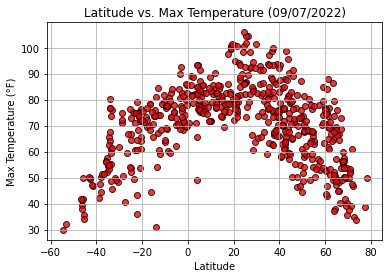

In [17]:
# Building Scatter Plot 
plt.scatter(City_Data_df["Lat"], City_Data_df["Max Temp"],facecolors="red",alpha=0.8,linewidth=1, marker="o", edgecolor="black")
plt.title("Latitude vs. Max Temperature (09/07/2022)")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save plot
plt.savefig("output_data/Latitude vs. Max_Temperature.png")

plt.show()

## Latitude vs. Humidity Plot

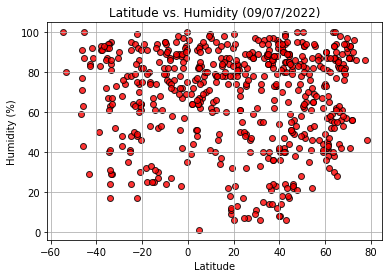

In [18]:
# Building Scatter Plot 
plt.scatter(City_Data_df["Lat"], City_Data_df["Humidity"],facecolors="red",alpha=0.8,linewidth=1, marker="o", edgecolor="black")
plt.title("Latitude vs. Humidity (09/07/2022)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save plot
plt.savefig("output_data/Latitude vs. Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

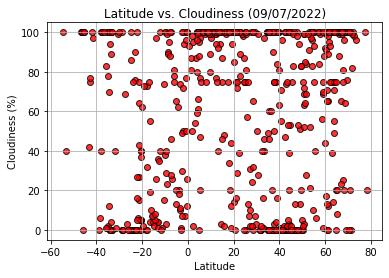

In [19]:
# Building Scatter Plot 
plt.scatter(City_Data_df["Lat"], City_Data_df["Cloudiness"],facecolors="red",alpha=0.8,linewidth=1, marker="o", edgecolor="black")
plt.title("Latitude vs. Cloudiness (09/07/2022)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save plot
plt.savefig("output_data/Latitude vs. Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

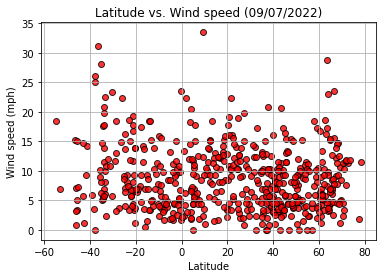

In [99]:
# Building Scatter Plot 
plt.scatter(City_Data_df["Lat"], City_Data_df["Wind speed"],facecolors="red",alpha=0.8,linewidth=1, marker="o", edgecolor="black")
plt.title("Latitude vs. Wind speed (09/07/2022)")
plt.ylabel("Wind speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save plot
plt.savefig("output_data/Latitude vs. Wind speed.png")

plt.show()

## Linear Regression

In [119]:
def plot_linear_regression(x_values,y_values,xlbl,ylbl,lblpos):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,lblpos ,fontsize=14, color="red")
    plt.xlabel(xlbl,fontsize =12)
    plt.ylabel(ylbl,fontsize =12)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [120]:
#creating the DataFrame base on the Lat
nothern_hemisp_df = City_Data_df.loc[City_Data_df["Lat"] >= 0]

southern_hemisp_df = City_Data_df.loc[City_Data_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6308041652821349


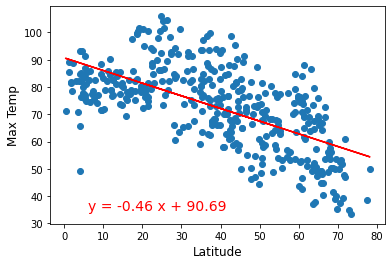

In [121]:
x_values = nothern_hemisp_df["Lat"]
y_values = nothern_hemisp_df["Max Temp"]
xlbl = "Latitude"
ylbl = "Max Temp"
eqpos = (6,35)
plot_linear_regression(x_values,y_values,xlbl,ylbl,eqpos)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7138791033351052


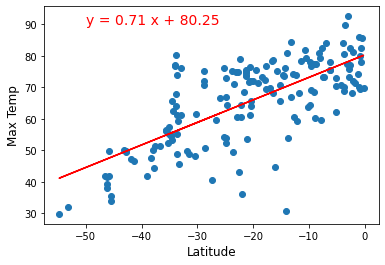

In [122]:
x_values = southern_hemisp_df["Lat"]
y_values = southern_hemisp_df["Max Temp"]
xlbl = "Latitude"
ylbl = "Max Temp"
eqpos = (-50,90)
plot_linear_regression(x_values,y_values,xlbl,ylbl,eqpos)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.014628914562182146


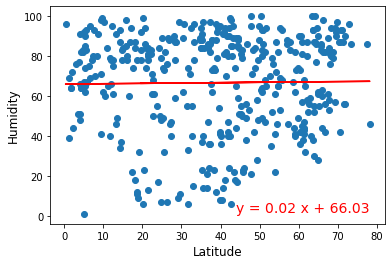

In [123]:
x_values = nothern_hemisp_df["Lat"]
y_values = nothern_hemisp_df["Humidity"]
xlbl = "Latitude"
ylbl = "Humidity"
eqpos = (44,2)
plot_linear_regression(x_values,y_values,xlbl,ylbl,eqpos)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03829268921550252


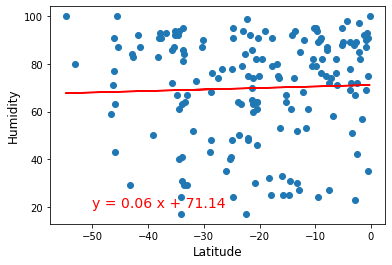

In [126]:
x_values = southern_hemisp_df["Lat"]
y_values = southern_hemisp_df["Humidity"]
xlbl = "Latitude"
ylbl = "Humidity"
eqpos = (-50,20)
plot_linear_regression(x_values,y_values,xlbl,ylbl,eqpos)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.07162066457776267


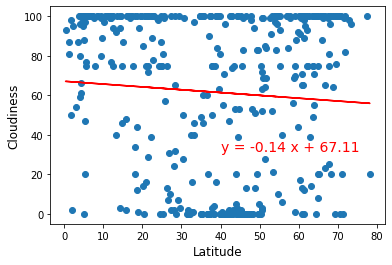

In [132]:
x_values = nothern_hemisp_df["Lat"]
y_values = nothern_hemisp_df["Cloudiness"]
xlbl = "Latitude"
ylbl = "Cloudiness"
eqpos = (40,32)
plot_linear_regression(x_values,y_values,xlbl,ylbl,eqpos)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.10001505647082994


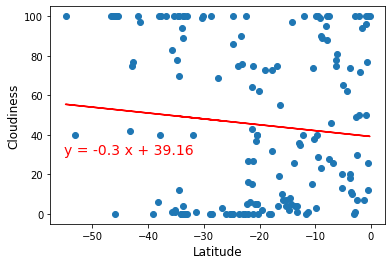

In [135]:
x_values = southern_hemisp_df["Lat"]
y_values = southern_hemisp_df["Cloudiness"]
xlbl = "Latitude"
ylbl = "Cloudiness"
eqpos = (-55,30)
plot_linear_regression(x_values,y_values,xlbl,ylbl,eqpos)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.07682394992678282


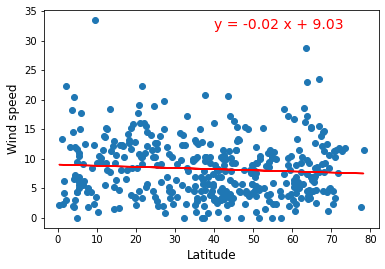

In [136]:
x_values = nothern_hemisp_df["Lat"]
y_values = nothern_hemisp_df["Wind speed"]
xlbl = "Latitude"
ylbl = "Wind speed"
eqpos = (40,32)
plot_linear_regression(x_values,y_values,xlbl,ylbl,eqpos)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2346498386929303


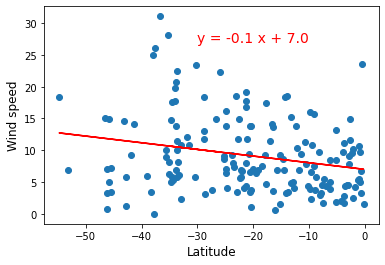

In [139]:
x_values = southern_hemisp_df["Lat"]
y_values = southern_hemisp_df["Wind speed"]
xlbl = "Latitude"
ylbl = "Wind speed"
eqpos = (-30,27)
plot_linear_regression(x_values,y_values,xlbl,ylbl,eqpos)